<div align="center">
    <a href="https://www.visual-layer.com" target="_blank" rel="noopener noreferrer">
    <picture>
    <source media="(prefers-color-scheme: dark)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo_dark_mode.png" width=350>
    <source media="(prefers-color-scheme: light)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=350>
    <img alt="vl logo." src="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png">
    </picture>
    </a>
    <br>
    <br>
    <a href="https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/JOIN US ON SLACK-4A154B?style=for-the-badge&logo=slack&logoColor=white" alt="Logo">
    </a>
    <a href="https://visual-layer.readme.io/discuss" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/DISCUSSION%20FORUM-slateblue?style=for-the-badge&logo=discourse&logoWidth=20" alt="Logo">
    </a>
    <a href="https://www.linkedin.com/company/visual-layer/" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white" alt="Logo">
    </a>
    <a href="https://twitter.com/visual_layer" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white" alt="Logo">
    </a>
    <a href="https://www.youtube.com/@visual-layer" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/-YouTube-black.svg?style=for-the-badge&logo=youtube&colorB=red" alt="Logo">
    </a>
</div>

# Analyze Torchvision Datasets

[![Open in Colab](https://img.shields.io/badge/Open%20in%20Colab-blue?style=for-the-badge&logo=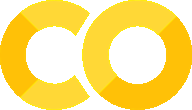&labelColor=gray)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/analyzing-torchvision-datasets.ipynb)
[![Kaggle](https://img.shields.io/badge/Open%20in%20Kaggle-blue?style=for-the-badge&logo=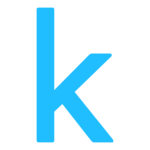&labelColor=gray)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/analyzing-torchvision-datasets.ipynb)
[![Explore the Docs](https://img.shields.io/badge/Explore%20the%20Docs-blue?style=for-the-badge&labelColor=gray&logo=read-the-docs)](https://visual-layer.readme.io/docs/analyzing-torchvision-datasets)

This notebook shows how you can analyze [Torchvision Datasets](https://pytorch.org/vision/main/datasets.html) for issues using fastdup.

## Installation

First, let's install the necessary packages.

In [1]:
!pip install -Uq fastdup torchvision

Now, test the installation. If there's no error message, we are ready to go.

In [2]:
import fastdup
fastdup.__version__

'1.43'

## Download Dataset
The Labelbox SDK does not provide a way to bulk download the dataset. We will download the dataset by iterating over each image in the dataset.

In [3]:
import os
from torchvision.datasets import CIFAR10

# Load the CIFAR10 dataset
cifar10_train = CIFAR10(root='./', train=True, download=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 170498071/170498071 [00:36<00:00, 4710190.39it/s]


Extracting ./cifar-10-python.tar.gz to ./


## Convert Dataset to Images
The downloaded dataset are in binary format. Let's convert them into images and save the in our local directory.

The resulting directory should look like this

```
cifar10-dataset/
    ├── airplane
    |    ├── 0001.JPEG
    |    └── 0002.JPEG
    ├── automobile
    ├── bird
    ├── cat
    ├── deer
    ├── dog
    ├── frog
    ├── horse
    ├── ship
    └── truck
```

In [12]:
from tqdm.auto import tqdm
base_dir = 'cifar10-dataset'

# Define a dictionary to map class labels to their names
label_names = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# Iterate over the CIFAR10 images and save them in the appropriate directory
for i in tqdm(range(len(cifar10_train)), desc="Saving images", total=len(cifar10_train), unit="Images"):
    image, label = cifar10_train[i]

    # Get the name of the current image's class
    class_name = label_names[label]

    # Create the directory for the current image's class if it doesn't exist
    class_dir = os.path.join(base_dir, class_name)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

    # Save the image using the ImageNet file naming convention
    img_filename = str(i).zfill(8) + '.JPEG'
    img_path = os.path.join(class_dir, img_filename)
    image.save(img_path)

Saving images:   0%|          | 0/50000 [00:00<?, ?Images/s]

## Construct Annotation DataFrame
fastdup expects the annotations of the dataset to be in a certain dataframe format.

In [13]:
import pandas as pd

# Get a list of file paths for all JPEG files in the directory and its subdirectories
file_paths = []
labels = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg')):
            file_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# Create a pandas dataframe from the list of file paths and labels
df = pd.DataFrame({'filename': file_paths, 'label': labels, 'split': 'train'})

# Print the resulting dataframe
df

,filename,label,split
0,cifar10-dataset/cat/00015523.JPEG,cat,train
1,cifar10-dataset/cat/00029960.JPEG,cat,train
2,cifar10-dataset/cat/00048561.JPEG,cat,train
3,cifar10-dataset/cat/00042023.JPEG,cat,train
4,cifar10-dataset/cat/00039428.JPEG,cat,train
...,...,...,...
49995,cifar10-dataset/ship/00016084.JPEG,ship,train
49996,cifar10-dataset/ship/00029598.JPEG,ship,train
49997,cifar10-dataset/ship/00047842.JPEG,ship,train
49998,cifar10-dataset/ship/00028829.JPEG,ship,train


## Run fastdup
One the dataset download completes, analyze the image folder where the dataset is stored.

In [17]:
fd = fastdup.create(input_dir="cifar10-dataset/")
fd.run(annotations=df)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
                                                                                                 
               :++.                                                  ...                                       
             ;&&$+.                               ;x:                ;;;                                       
            .$&+                                  X&x                ;;;                                       
           X$&&&$$;    :$&&$+. ;$x    .x&&&X:   ;$&&&$$$:    :;;;;:. ;;;  :;;.      .;;.  :;;  :;;;;;.         
           +x&&Xxx: :$&&Xx++X&&$&$  .&&$+;+$&&; :x&&$xxx: .;;;;;:;;;;;;;  :;;.      .;;:  :;;;;;;:;;;;;:       
            .$&;   :$&X       +&&$  ;&$.    ;XX   X&x    .;;;       ;;;;  :;;.      .;;:  :;;;.      :;;:      
            .$&;   +&&.        x&$  .$&&$+.       X&x    ;;;         ;;;  :;;.      .;;:  :;;.        ;;;      
            .$&;   +&&.        x&$     ;X&&

0

## View Galleries

You can use all of fastdup gallery methods to view duplicates, clusters, etc.

cat


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Finished OK. Components are stored as image files work_dir/galleries/components_[index].jpg
Stored components visual view in  work_dir/galleries/components.html
Execution time in seconds 3.7
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



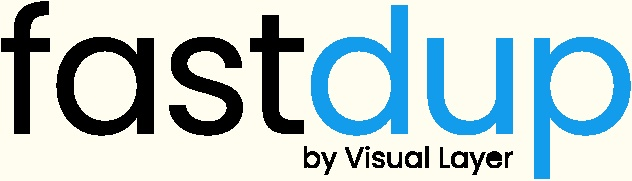
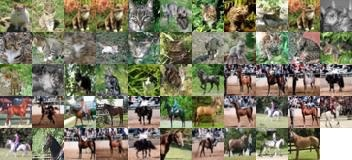
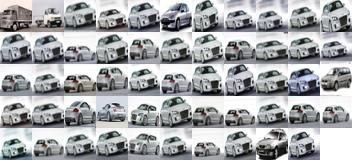
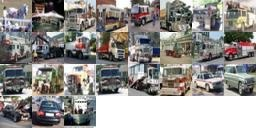
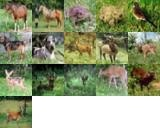
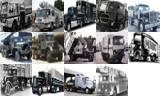
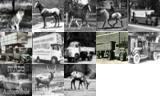
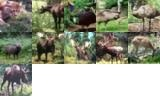
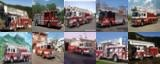
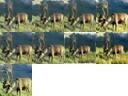
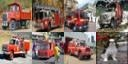
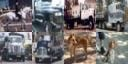
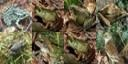
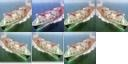
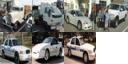
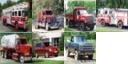
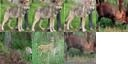
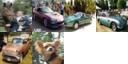
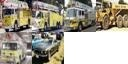
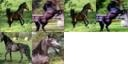
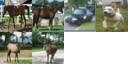

0

In [18]:
fd.vis.component_gallery()

/home/dnth/anaconda3/envs/fastdup/lib/python3.10/site-packages/fastdup/galleries.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))
/home/dnth/anaconda3/envs/fastdup/lib/python3.10/site-packages/fastdup/galleries.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored similarity visual view in  work_dir/galleries/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



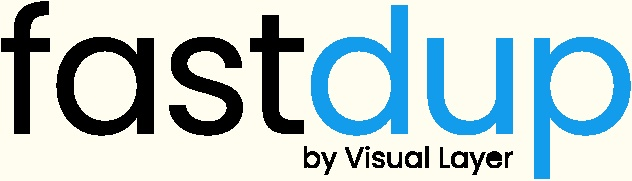
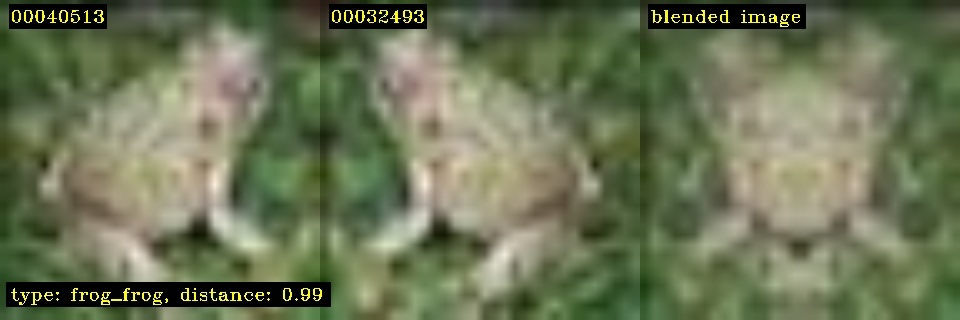
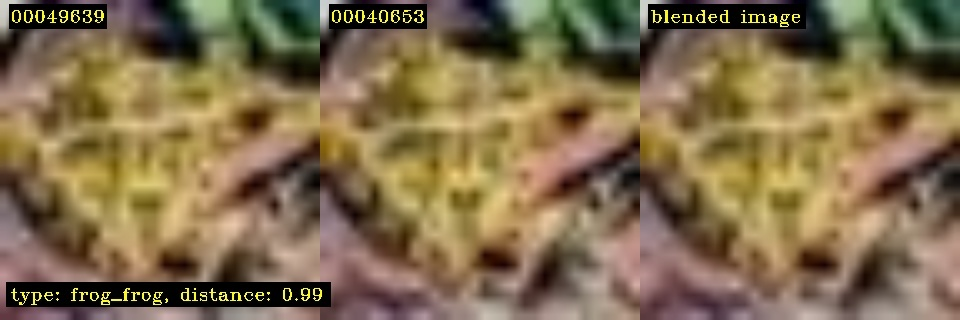
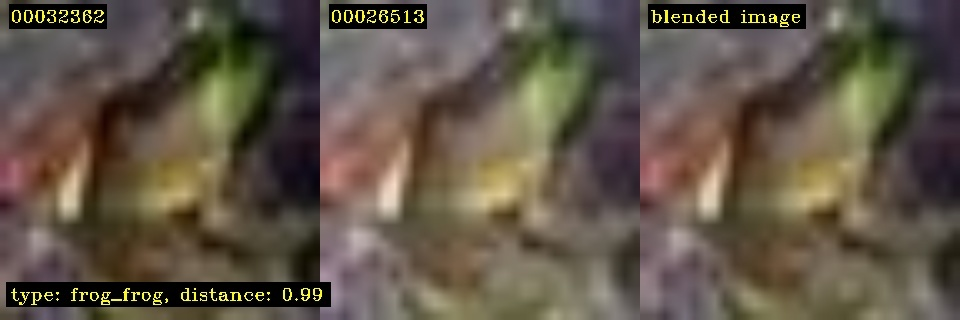
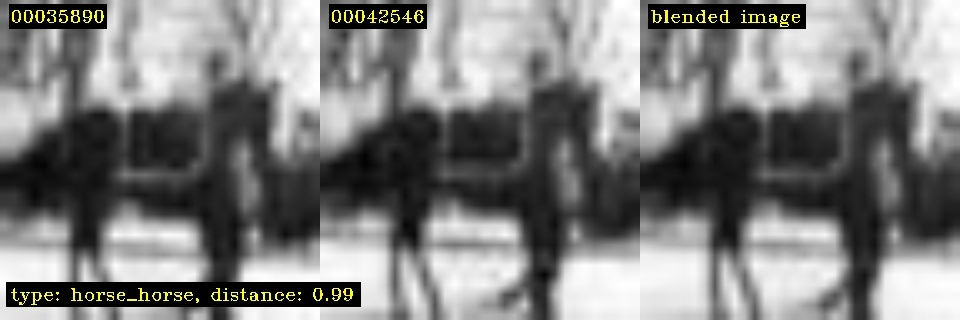
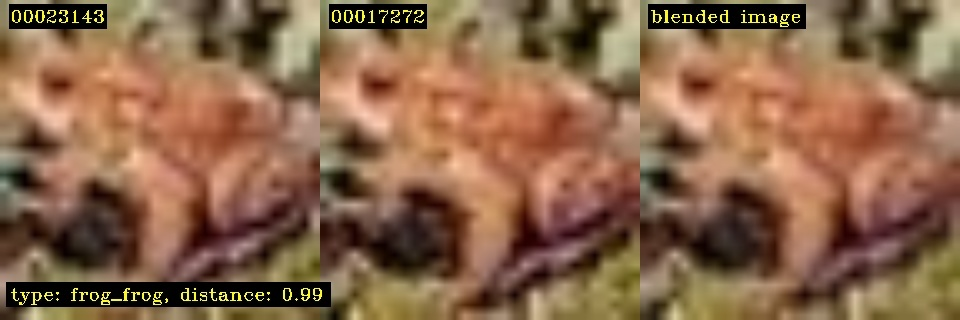
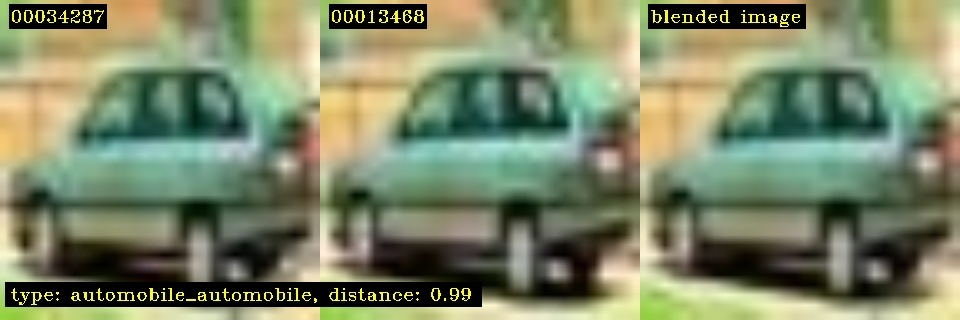
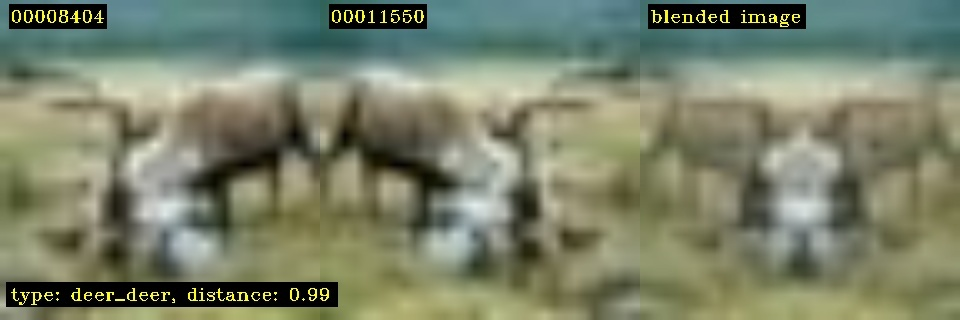
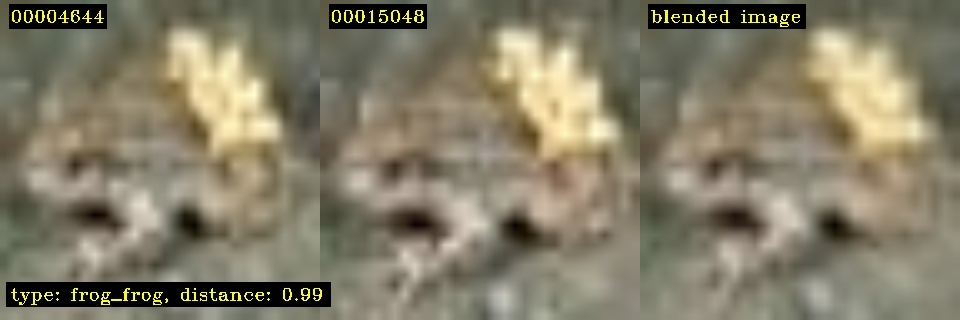
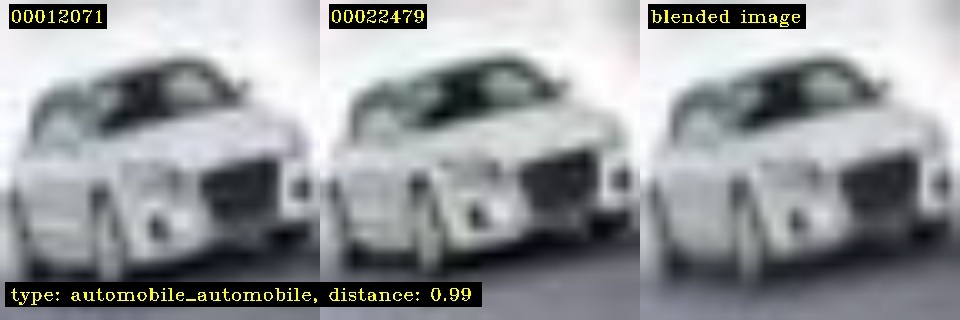
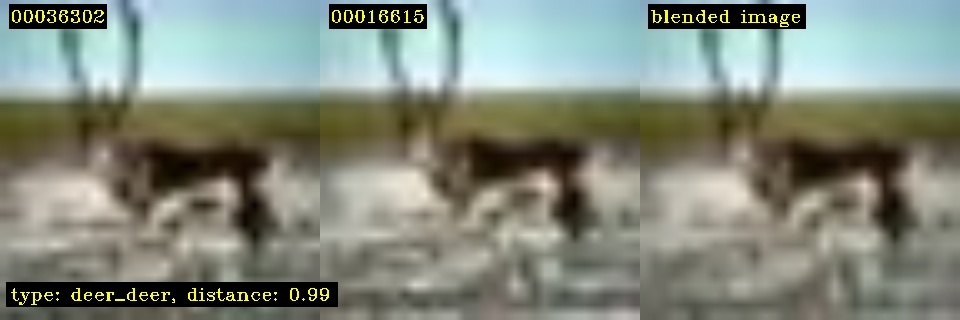

0

In [22]:
fd.vis.duplicates_gallery()

## Wrap Up
In this tutorial, we showed how you can analyze datasets from Torchvision Datasets using fastdup.

Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try.


## VL Profiler - A faster and easier way to diagnose and visualize dataset issues

If you prefer a no-code platform to inspect and visualize your dataset, [**try our free cloud product VL Profiler**](https://app.visual-layer.com) - VL Profiler is our first no-code commercial product that lets you visualize and inspect your dataset in your browser. 

VL Profiler is free to get started. Upload up to 1,000,000 images for analysis at zero cost!

[Sign up](https://app.visual-layer.com) now.

[![image](https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/github_banner_profiler.gif)](https://app.visual-layer.com)

As usual, feedback is welcome! Questions? Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) or open an issue on [GitHub](https://github.com/visual-layer/fastdup/issues).

<center> 
    <a href="https://www.visual-layer.com" target="_blank" rel="noopener noreferrer">
    <picture>
    <source media="(prefers-color-scheme: dark)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo_dark_mode.png" width=200>
    <source media="(prefers-color-scheme: light)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=200>
    <img alt="vl logo." src="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=200>
    </picture>
    </a><br>
    <a href="https://github.com/visual-layer/fastdup" target="_blank" style="text-decoration: none;"> GitHub </a> •
    <a href="https://visual-layer.slack.com/" target="_blank" style="text-decoration: none;"> Join Slack Community </a> •
    <a href="https://visual-layer.readme.io/discuss" target="_blank" style="text-decoration: none;"> Discussion Forum </a>
</center>

<center> 
    <a href="https://medium.com/visual-layer" target="_blank" style="text-decoration: none;"> Blog </a> •
    <a href="https://visual-layer.readme.io/" target="_blank" style="text-decoration: none;"> Documentation </a> •
    <a href="https://visual-layer.com/about" target="_blank" style="text-decoration: none;"> About Us </a> 
</center>

<center> 
    <a href="https://www.linkedin.com/company/visual-layer/" target="_blank" style="text-decoration: none;"> LinkedIn </a> •
    <a href="https://twitter.com/visual_layer" target="_blank" style="text-decoration: none;"> Twitter </a>
</center>